In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

# 6장 최적화 

## 6.1 헤세 판정법 

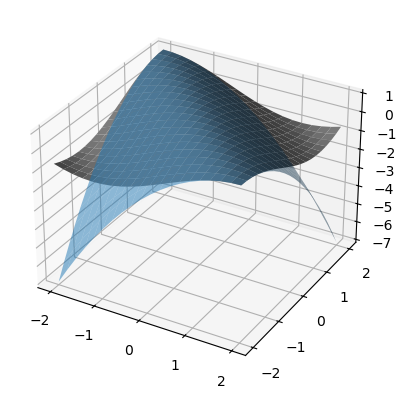

In [2]:
# 원함수 f와 2차 테일러 다항식의 그래프 비교
f = lambda x, y: np.cos(x + y)
p2 = lambda x, y: 1 - x**2/2 - x*y - y**2/2
x = y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y), color='gray')
ax.plot_surface(X, Y, p2(X, Y), alpha=.5, color='C0')

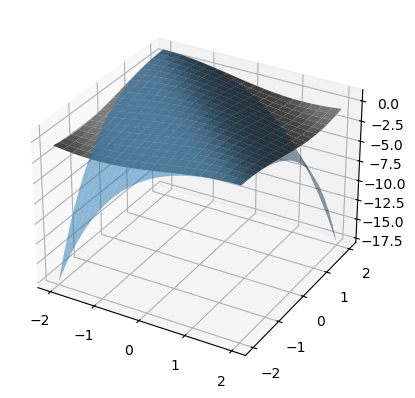

In [7]:
T = lambda x, y: np.cos(x + y)
p2 = lambda x, y: 1 - x**2/2 - x*y - y**2/2
def p4(x,y):
    sum = p2(x,y) 
    for i in range(5):
        comb = 1 
        for j in range(i):
            comb *= (4-j)/(j+1)
        sum -= comb/24*x**(4-i)*y**i
    return sum
x = y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, T(X, Y), color='gray')
ax.plot_surface(X, Y, p4(X, Y), alpha=.5, color='C0')

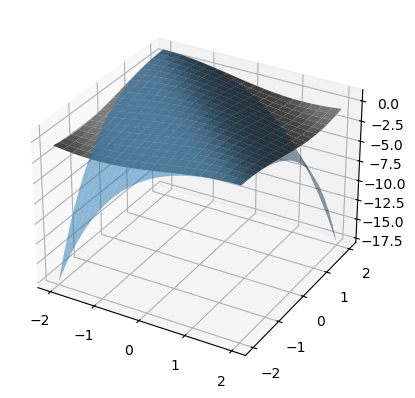

In [8]:
# 원함수 f와 4차 테일러 다항식의 그래프 비교
T = lambda x, y: np.cos(x + y)
p2 = lambda x, y: 1 - x**2/2 - x*y - y**2/2
def p4(x,y):
    sum = p2(x,y) 
    for i in range(5):
        comb = 1 
        for j in range(i):
            comb *= (4-j)/(j+1)
        sum -= comb/24*x**(4-i)*y**i
    return sum
x = y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, T(X, Y), color='gray')
ax.plot_surface(X, Y, p4(X, Y), alpha=.5, color='C0')

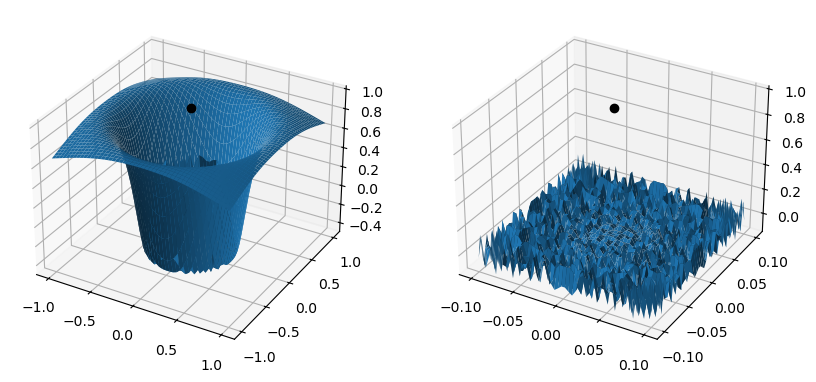

In [9]:
# 함수 (6.8)의 그래프 그리기
f = lambda x: np.sqrt(np.sum(x**2, axis=0))*np.sin(1/np.sum(x**2, axis=0))
fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})
d = [1, .1]
for i in range(2):
    x = y = np.linspace(-d[i], d[i])
    xy = np.array(np.meshgrid(x, y))
    ax[i].plot_surface(*xy, f(xy), zorder=3)
    ax[i].plot(0, 0, 1, 'ok', zorder=4)

Text(0.5, 0.5, 'Y')

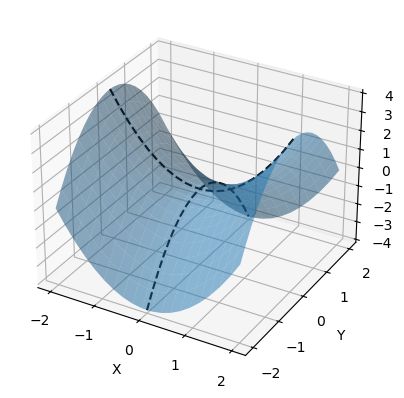

In [10]:
# 함수 (6.10)의 그래프와 점 (0, 0)을 지나는 보조선 그리기
f = lambda x: x[0]**2 - x[1]**2
x = y = np.linspace(-2, 2, 20)
XY = np.array(np.meshgrid(x, y))
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(*XY, f(XY), alpha=.5)
ax.plot(x, 0*x, f(np.array([x, 0*x])), 'k--')
ax.plot(0*y, y, f(np.array([0*y, y])), 'k--')
ax.set_xlabel('X')
ax.set_ylabel('Y')

Text(0.5, 0.5, 'Y')

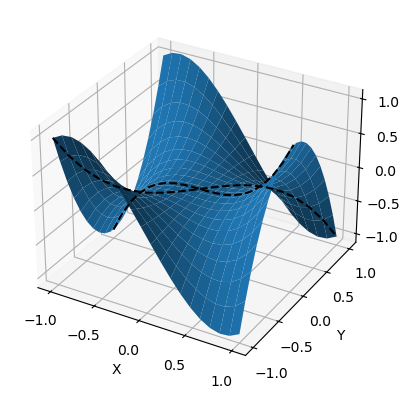

In [12]:
# 함수 (6.11)의 그래프와 (0, 0)을 지나는 보조선 그리기
f = lambda x: x[0]**3 - 2*x[0]*x[1]**2
intv = np.linspace(-1, 1, 20)
xy = np.array(np.meshgrid(intv, intv))
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(*xy, f(xy))
ax.plot(intv, 0*intv, f(np.array([intv, 0*intv])), 'k--', zorder=4)
ax.plot(intv, intv, f(np.array([intv, intv])), 'k--', zorder=4)
ax.set_xlabel('X')
ax.set_ylabel('Y')

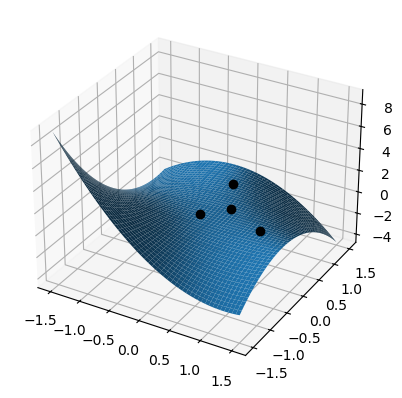

In [13]:
# 함수 (6.12)의 그래프와 임계점 표시
f = lambda x: x[0]*x[1]*(1-x[0]-x[1])
crit = np.array([[0, 0], [1, 0], [0, 1], [1/3, 1/3]])
x = y = np.linspace(-1.5, 1.5)
xy = np.array(np.meshgrid(x, y))
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(*xy, f(xy))
plt.plot(crit[:, 0], crit[:, 1], 'ok', zorder=4)

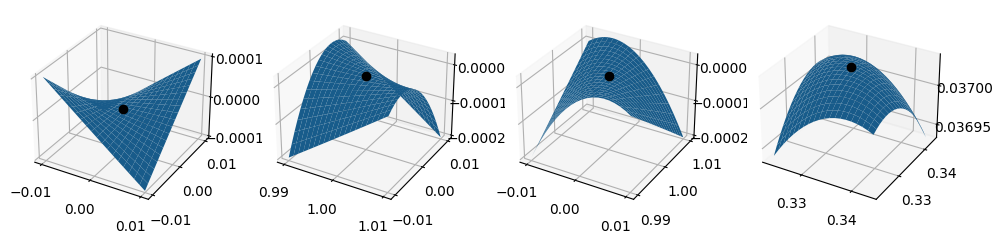

In [ ]:
# 임계점 (6.13)의 근방에서 함수의 그래프 그리기
f = lambda x: x[0]*x[1]*(1-x[0]-x[1])
crit = np.array([[0, 0], [1, 0], [0, 1], [1/3, 1/3]])
eps = .01
fig, ax = plt.subplots(1, 4, subplot_kw=dict(projection='3d'))
fig.set_size_inches(12, 3)
axs = ax.ravel()
for i in range(4):
    ax = axs[i]
    x = np.linspace(crit[i, 0]-eps, crit[i, 0]+eps, 20)
    y = np.linspace(crit[i, 1]-eps, crit[i, 1]+eps, 20)
    xy = np.array(np.meshgrid(x, y))
    ax.plot_surface(*xy, f(xy), zorder=3)
    ax.plot(*crit[i], f(crit[i]), 'ko', zorder=4)

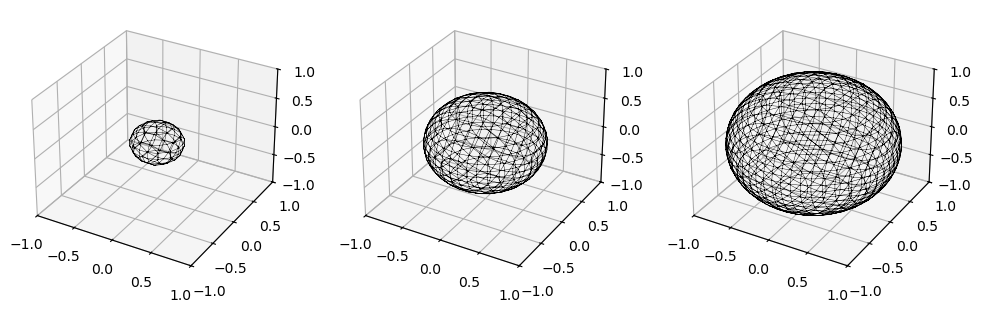

In [14]:
# 함수 (6.14)의 등위면 그리기
from contour import contour

f = lambda x: np.sum(x**2, axis=0)
lvls = [.1, .5, 1.]
itv = np.linspace(-1, 1, 20)
[X, Y, Z] = np.array(np.meshgrid(itv, itv, itv))
W = np.array(f(np.array([X, Y, Z])))
fig, ax = plt.subplots(1, 3, subplot_kw=dict(projection='3d'), figsize=(12, 4))
for i, lvl in enumerate(lvls):
    c = contour(np.array([X, Y, Z, W]), lvl)
    ax[i].plot(c[:, 0], c[:, 1], c[:, 2], 'k', lw=.3)
    ax[i].set_xlim(-1, 1)
    ax[i].set_ylim(-1, 1)
    ax[i].set_zlim(-1, 1)

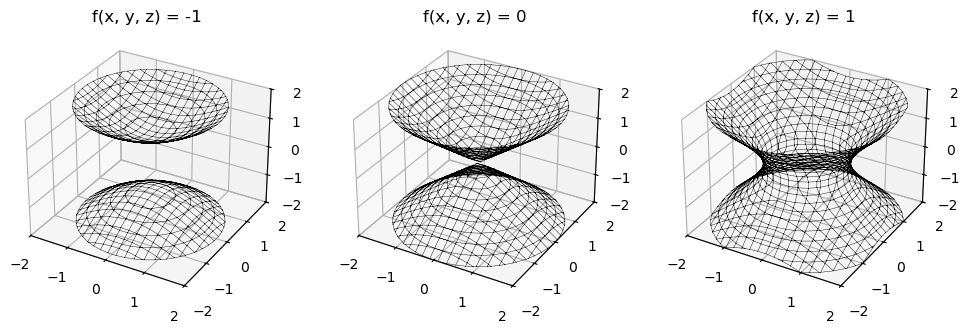

In [15]:
# 함수 (6.15)의 등위면 그리기
f = lambda x: x[0]**2 + x[1]**2 - x[2]**2
itvs = np.vstack([np.linspace(-2, 2, 20)]*3)
[X, Y, Z] = np.array(np.meshgrid(*itvs))
W = np.array(f(np.array([X, Y, Z])))
fig, ax = plt.subplots(1, 3, subplot_kw=dict(projection='3d'), figsize=(12, 4))
fig.set_size_inches(12, 4)
lvls = [-1, 0, 1]
for i, lvl in enumerate(lvls):
    ax[i].set_xlim(-2, 2)
    ax[i].set_ylim(-2, 2)
    ax[i].set_zlim(-2, 2)
    c = contour(np.array([X, Y, Z, W]), lvl)
    ax[i].plot(c[:, 0], c[:, 1], c[:, 2], 'k', lw=.3)
    ax[i].set_title(f'f(x, y, z) = {lvl}')

MovieWriter imagemagick unavailable; using Pillow instead.


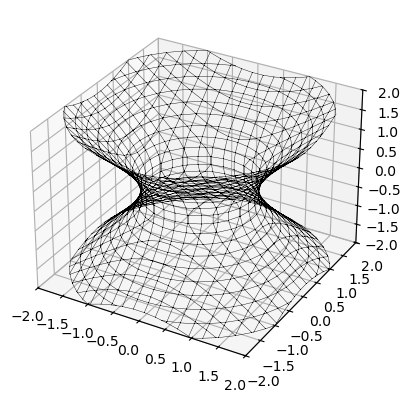

In [17]:
# 등위값이 변할 때의 함수 (6.15)의 등위면 형태를 애니메이션으로 표현
f = lambda x: x[0]**2 + x[1]**2 - x[2]**2
itvs = np.vstack([np.linspace(-2, 2, 20)]*3)
[X, Y, Z] = np.array(np.meshgrid(*itvs))
W = f(np.array([X, Y, Z]))
ax = plt.subplot(projection='3d')
lvls = np.linspace(-1, 1, 100)
ani_contour_line, = ax.plot([],[],[], 'k', lw=.3)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

def update(i):
    c = contour(np.array([X, Y, Z, W]), lvls[i])
    ani_contour_line.set_data(c[:, 0], c[:, 1])
    ani_contour_line.set_3d_properties(c[:, 2])
    return ani_contour_line,

a = ani.FuncAnimation(ax.figure, update, frames=len(lvls), interval=len(lvls))
a = a.save('6-1.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


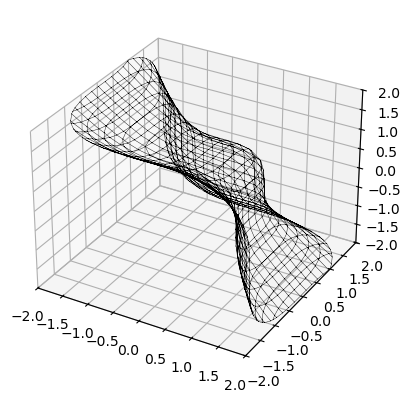

In [18]:
# 등위값이 변할 때의 함수 (6.16)의 등위면 형태를 애니메이션으로 표현
f = lambda x: np.sum(x**3, axis=0)
itvs = np.vstack([np.linspace(-2, 2, 20)]*3)
[X, Y, Z] = np.array(np.meshgrid(*itvs))
W = np.array(f(np.array([X, Y, Z])))
ax = plt.subplot(projection='3d')
lvls = np.linspace(-1, 1, 100)
ani_contour_line, = ax.plot([],[],[], 'k', lw=.3)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

def update(i):
    c = contour(np.array([X, Y, Z, W]), lvls[i])
    ani_contour_line.set_data(c[:, 0], c[:, 1])
    ani_contour_line.set_3d_properties(c[:, 2])
    return ani_contour_line,

a = ani.FuncAnimation(ax.figure, update, frames=len(lvls), interval=len(lvls))
a = a.save('6-2.gif', writer='imagemagick')

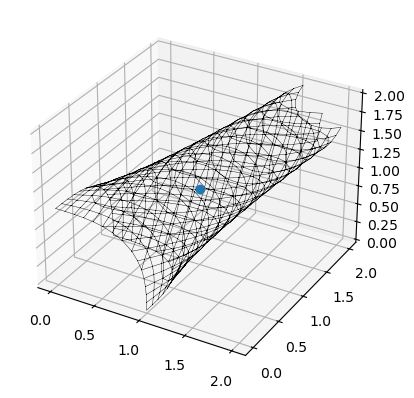

In [19]:
# 함수 (6.21)의 등위면 그리기
intvl = np.linspace(0, 2, 20)
[X, Y, Z] = np.meshgrid(*[intvl]*3)
W = np.array(X**3 + Y**3 + Z**3 - 3*X*Y*Z)
ax = plt.subplot(projection='3d')
c = contour(np.array([X, Y, Z, W]), 1)
ax.plot(c[:, 0], c[:, 1], c[:, 2], 'k', lw=.3)
ax.plot(1, 1, 1, 'o', zorder=4)

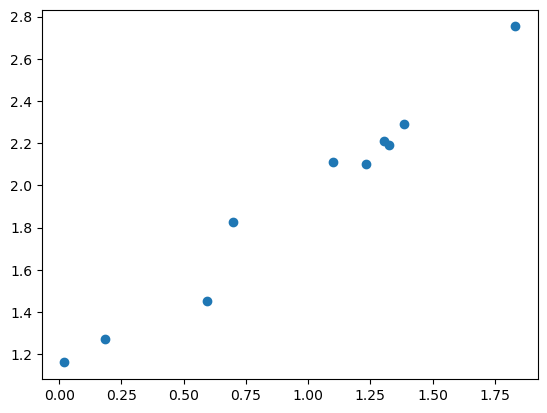

In [20]:
# 2차원 데이터에 대한 산포도의 시각화
xy = np.array([
    [0.021, 0.186, 1.326, 1.101, 1.832, 1.383, 1.306, 1.233, 0.697, 0.592],
    [1.161, 1.273, 2.193, 2.111, 2.753, 2.293, 2.212, 2.103, 1.828, 1.453]])
plt.scatter(xy[0], xy[1])

0.8647287636623477 1.101201975403946


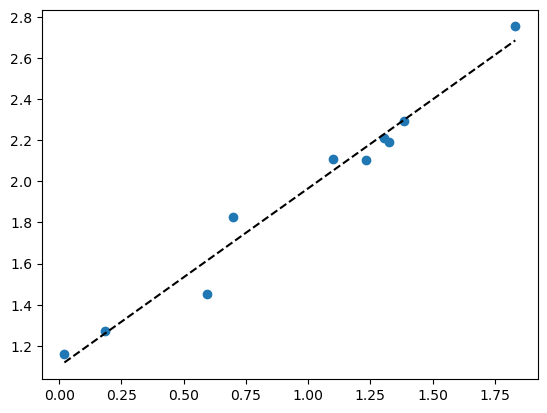

In [21]:
# 산포도와 선형회귀선 그리기
xy = np.array([
    [0.021, 0.186, 1.326, 1.101, 1.832, 1.383, 1.306, 1.233, 0.697, 0.592],
    [1.161, 1.273, 2.193, 2.111, 2.753, 2.293, 2.212, 2.103, 1.828, 1.453]])
x, y, n = xy[0], xy[1], len(xy[0])
a, b, c, d, e = np.sum(y**2), np.sum(x*y), np.sum(y), np.sum(x), np.sum(x**2)
mu, rho = (n*b - c*d)/(n*e - d**2), (e*c - b*d)/(n*e - d**2)
print(mu, rho)
plt.scatter(x, y)
t = np.linspace(np.min(x), np.max(x), 2)
plt.plot(t, mu*t + rho, '--k')


MovieWriter imagemagick unavailable; using Pillow instead.


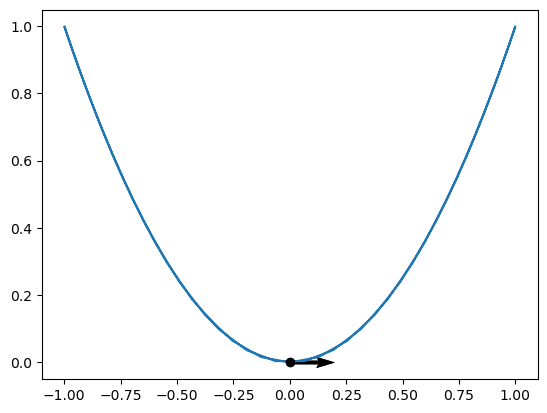

In [22]:
# 일변수함수의 연쇄법칙을 시각적으로 표현 
t = np.linspace(0, 2*np.pi)
x, xp = np.sin(t), np.cos(t)
y, yp = x**2, 2*x*xp
plt.plot(x, y)
xy_point, = plt.plot([], [], 'ko')
xy_quiver = plt.quiver(0, 0, 0, 0, angles='xy', scale_units='xy', scale=5)
x_quiver = plt.quiver(0, 0, 0, 0, angles='xy', scale_units='xy', scale=5)
y_quiver = plt.quiver(0, 0, 0, 0, angles='xy', scale_units='xy', scale=5)

def update(i):
    xy_point.set_data([x[i]], [y[i]])
    xy_quiver.set_offsets([[x[i], y[i]]])
    x_quiver.set_offsets([[x[i], y[i]]])
    y_quiver.set_offsets([[x[i], y[i]]])
    xy_quiver.set_UVC(xp[i], yp[i])
    x_quiver.set_UVC(xp[i], 0)
    y_quiver.set_UVC(0, yp[i])
    return xy_point, xy_quiver,

a = ani.FuncAnimation(plt.gcf(), update, frames=len(t), interval=len(t))
a.save('6-3.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


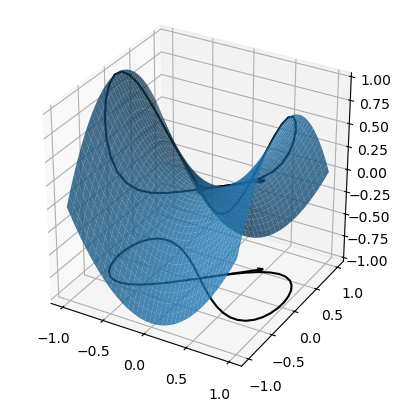

In [23]:
# 이변수함수의 연쇄법칙의 시각화
f = lambda x, y: x**2 - y**2
t = np.linspace(0, 2*np.pi)
x, y = np.sin(t), np.cos(t)*np.sin(t)
xp, yp = np.cos(t), np.cos(2*t)
z, zp = f(x, y), 2*x*xp - 2*y*yp

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(-1, 1, 40), np.linspace(-1, 1, 40))
ax.set_aspect('equal')
ax.plot_surface(xx, yy, f(xx, yy), alpha=.8, zorder=3)
ax.plot(x, y, f(x, y), 'k', zorder=4)
ax.plot(x, y, -1, 'k', zorder=4)
point, = ax.plot([], [], [], 'o', color='C0', zorder=4)
xyz_quiver = ax.quiver(0, 0, 0, 0, 0, 0)
xy_quiver = ax.quiver(0, 0, 0, 0, 0, 0)
z_quiver = ax.quiver(0, 0, 0, 0, 0, 0)

# 프레임마다 그래픽을 생성하는 함수
def update(i):
    global xyz_quiver, xy_quiver, z_quiver
    point.set_data([x[i]], [y[i]])
    point.set_3d_properties(z[i])
    xyz_quiver.remove()
    xy_quiver.remove()
    z_quiver.remove()
    xyz_quiver = ax.quiver(x[i], y[i], z[i], 
                  xp[i], yp[i], zp[i], 
                  arrow_length_ratio=0.1, color='k', length=.5)
    xy_quiver = ax.quiver(x[i], y[i], -1, 
                  xp[i], yp[i], 0, 
                  arrow_length_ratio=0.1, color='k', length=.5)
    z_quiver = ax.quiver(x[i], y[i], z[i], 
                  0, 0, zp[i],
                  arrow_length_ratio=0.1, color='C0', length=.5)
    return point,

a = ani.FuncAnimation(fig, update, frames=len(t), interval=len(t), blit=True) 
a.save('6-4.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


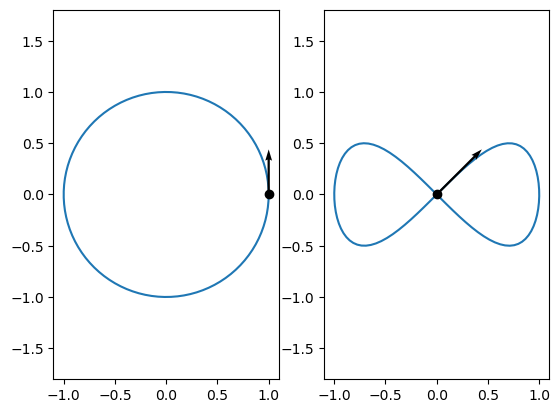

In [24]:
# [예제 6-9]를 애니메이션으로 구현
T = lambda u, v: [v, u*v]
DT = lambda u, v: np.array([[0, 1], [v, u]])
t = np.linspace(0, 2*np.pi, 100)
u, v = np.cos(t), np.sin(t)
up, vp = -np.sin(t), np.cos(t)
x, y = T(u, v)

fig, axs = plt.subplots(1, 2)
axs[0].plot(u, v)
axs[0].axis('equal')
axs[1].plot(x, y, 'C0')
axs[1].axis('equal')
uv_pplot, = axs[0].plot([], [], 'ko')
xy_pplot, = axs[1].plot([], [], 'ko')
uv_qplot = axs[0].quiver(0, 0, 0, 0, scale=5, width=.01, zorder=4)
xy_qplot = axs[1].quiver(0, 0, 0, 0, scale=5, width=.01, zorder=4)

def update(i):
    uv_pplot.set_data([u[i]], [v[i]])
    xy_pplot.set_data([x[i]], [y[i]])
    uv_qplot.set_offsets([u[i], v[i]])
    uv_qplot.set_UVC(up[i], vp[i])
    xy_qplot.set_offsets([x[i], y[i]])
    xy_qplot.set_UVC(DT(u[i], v[i])[0] @ np.array([up[i], vp[i]]),
                     DT(u[i], v[i])[1] @ np.array([up[i], vp[i]]))
    return uv_pplot, xy_pplot, uv_qplot, xy_qplot,

a = ani.FuncAnimation(fig, update, frames=100, interval=100, blit=True) 
a.save('6-5.gif', writer='imagemagick')

(np.float64(-0.09999370638369376),
 np.float64(2.099867834057569),
 np.float64(-0.1456623359589343),
 np.float64(3.05890905513762))

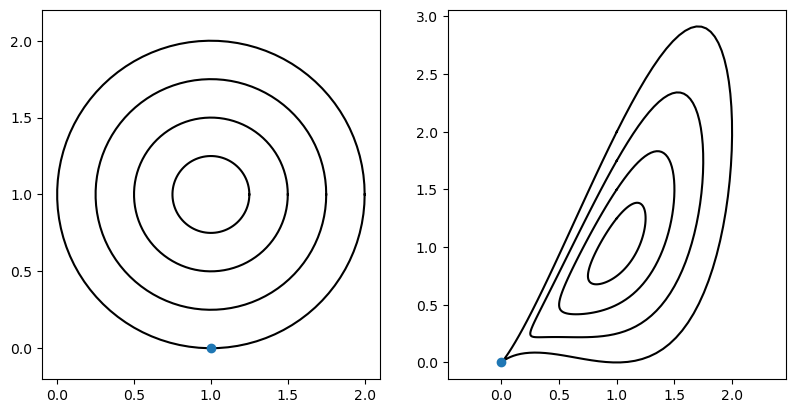

In [26]:
# 역함수가 존재하지 않는 점 근방에서의 다변수함수의 치역 그리기
T = lambda u, v: [v, u*v]
t = np.linspace(0, 2*np.pi, 100)

_, ax = plt.subplots(1, 2, figsize=plt.figaspect(.5))
for r in np.linspace(0, 1, 5):
    u, v = 1 + r*np.cos(t), 1 + r*np.sin(t)
    x, y = T(u, v)
    ax[0].plot(u, v, 'k')
    ax[1].plot(x, y, 'k')

ax[0].plot(1,0, 'o', color='C0')
ax[1].plot(0,0, 'o', color='C0')
ax[0].axis('equal')
ax[1].axis('equal')

MovieWriter imagemagick unavailable; using Pillow instead.


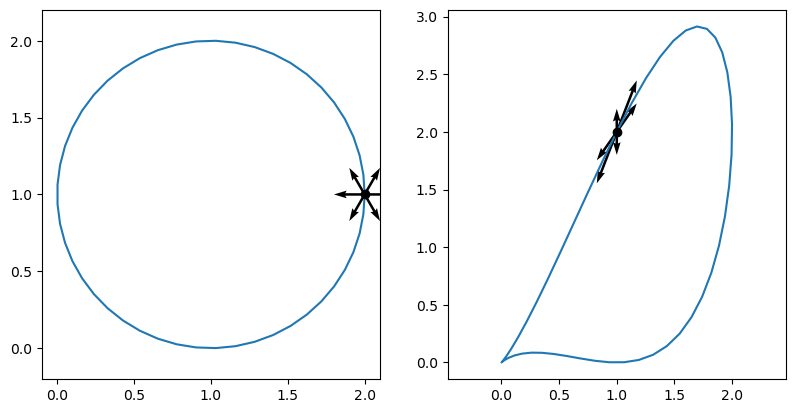

In [29]:
T = lambda u, v: [v, u*v]
t = np.linspace(0, 2*np.pi)
u, v = 1+np.cos(t), 1+np.sin(t)
x, y = T(u, v)
DT = lambda u, v: np.array([[0, 1], [v, u]])
theta = np.arange(0, 2*np.pi, 2*np.pi/6)
up, vp = np.cos(theta), np.sin(theta)

fig, ax = plt.subplots(1, 2, figsize=plt.figaspect(.5))
ax[0].plot(u, v)
ax[1].plot(x, y)
ax[0].axis('equal')
ax[1].axis('equal')
uv_pplot, = ax[0].plot([], [], 'ok')
xy_pplot, = ax[1].plot([], [], 'ok')
z = np.zeros_like(theta)
uv_qplot = ax[0].quiver(z, z, z, z, angles='xy', scale_units='xy', scale=5)
xy_qplot = ax[1].quiver(z, z, z, z,angles='xy', scale_units='xy', scale=5)

def update(i):
    uv_pplot.set_data([u[i]], [v[i]])
    xy_pplot.set_data([x[i]], [y[i]])
    uv_qplot.set_offsets([[u[i], v[i]] for _ in range(len(theta))])
    uv_qplot.set_UVC(up, vp)
    xy_qplot.set_offsets([[x[i], y[i]] for _ in range(len(theta))])
    xy = DT(u[i], v[i]) @ np.array([up, vp])
    xy_qplot.set_UVC(xy[0], xy[1])
    return uv_pplot, xy_pplot, uv_qplot, xy_qplot,

a = ani.FuncAnimation(fig, update, frames=len(t), interval=len(t), blit=True) 
a.save('6-6.gif', writer='imagemagick')

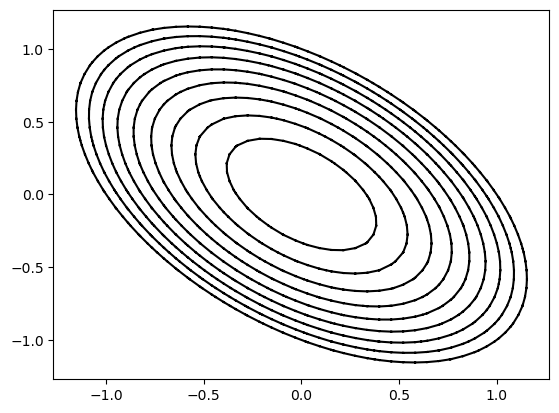

In [30]:
# 함수 (6.52)의 등위선의 시각화
g = lambda x, y: x**2 + x*y + y**2
x = y = np.linspace(-1.5, 1.5)
X, Y = np.meshgrid(x, y)
for t in np.linspace(0, 1, 10):
    c = contour(np.array([X, Y, g(X, Y)]), t)
    plt.plot(c[:, 0], c[:, 1], 'k')

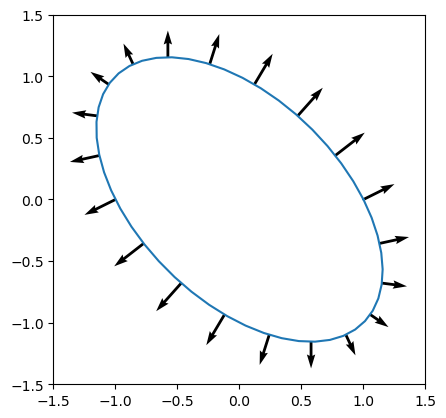

In [ ]:
# 함수 (6.53)의 등위선과 그래디언트의 시각화
plt.figure(figsize=plt.figaspect(1)) 
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
c = lambda t: [np.cos(t)- np.sin(t)/np.sqrt(3), 2/np.sqrt(3)*np.sin(t)]
grd = lambda x, y: [2*x + y, x + 2*y]
x, y = c(np.linspace(0, 2*np.pi))
qx, qy = c(np.arange(0, 2*np.pi, 2*np.pi/20))
qu, qv = grd(qx, qy)
plt.plot(x, y)
plt.quiver(qx, qy, qu, qv, angles='xy', scale_units='xy', scale=8)

(441, 3)


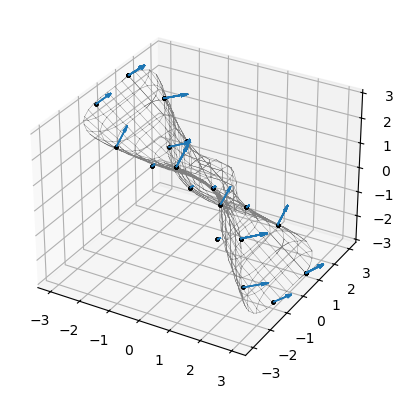

In [34]:
# 함수 (6.56)의 등위면과 그래디언트의 시각화
ax = plt.figure().add_subplot(projection='3d')
f = lambda p: np.sum(p**3, axis=0)
grd = lambda x, y, z: np.array([3*x**2, 3*y**2, 3*z**2])

itvl = np.linspace(-3, 3, 16)
X, Y, Z = np.meshgrid(itvl, itvl, itvl)
c = contour(np.array([X, Y, Z, f(np.array([X, Y, Z]))]), 1)
ax.plot(c[:, 0], c[:, 1], c[:, 2], 'gray', lw=.3)

itvl = np.linspace(-3, 3, 4)
X, Y, Z = np.meshgrid(itvl, itvl, itvl)
c = contour(np.array([X, Y, Z, f(np.array([X, Y, Z]))]), 1)
print(c.shape)
for i in range(len(c)):
    ax.plot(*c[i], 'ok', markersize=2)
    ax.quiver(*c[i], *grd(*c[i]), color='C0',
          lw=1, arrow_length_ratio=0.3, length=.02)

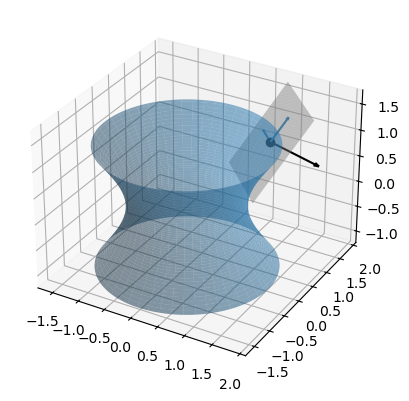

In [37]:
# 함수 (6.57)의 그래디언트와 등위면의 직교 관계의 시각화
S = lambda u, v: np.array([np.cosh(u)*np.cos(v), np.cosh(u)*np.sin(v), np.sinh(u)])
Su = lambda u, v: np.array([np.sinh(u)*np.cos(v), np.sinh(u)*np.sin(v), np.cosh(u)])
Sv = lambda u, v: np.array([-np.cosh(u)*np.sin(v), np.cosh(u)*np.cos(v), 0])
grd = lambda x, y, z: np.array([2*x, 2*y, -2*z])
P = np.array([1, 1, 1])

ax = plt.figure().add_subplot(projection='3d')
u, v = np.linspace(-1, 1, 100), np.linspace(0, 2*np.pi, 100)
U, V = np.meshgrid(u, v)
ax.plot_surface(*S(U, V), alpha=.5, zorder=3)

u0, v0 = np.log(1+np.sqrt(2)), np.pi/4
ax.plot(*S(u0, v0), 'ok', zorder=4)
ax.quiver(*S(u0, v0), *grd(*S(u0, v0)), color='k', arrow_length_ratio=0.1, length=.3, zorder=4)
ax.quiver(*S(u0, v0), *Su(u0, v0), color='C0', arrow_length_ratio=0.1, length=.3, zorder=4)
ax.quiver(*S(u0, v0), *Sv(u0, v0), color='C0', arrow_length_ratio=0.1, length=.3, zorder=4)

a = b = np.linspace(-.5, .5)
A, B = np.meshgrid(a, b)
X = P + A[:, :, np.newaxis]*Su(u0, v0) + B[:, :, np.newaxis]*Sv(u0, v0)
ax.plot_surface(X[:, :, 0], X[:, :, 1], X[:, :, 2], color='gray', alpha=.5, zorder=3)

<a list of 21 text.Text objects>

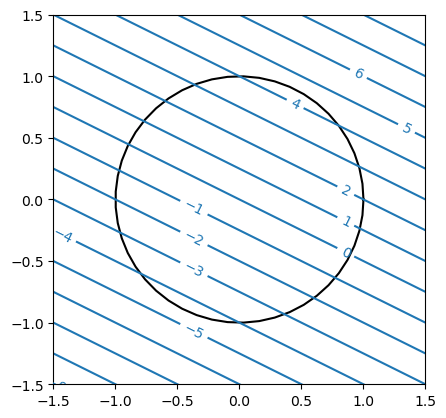

In [39]:
# 제약함수와 목적함수의 등위선 비교
f = lambda x, y: 2*x + 4*y 
itvl = np.linspace(-2, 2)
X, Y = np.meshgrid(itvl, itvl)
Z = f(X, Y)
t = np.linspace(0, 2*np.pi)
plt.figure(figsize=plt.figaspect(1))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.plot(np.cos(t), np.sin(t), 'k')
c = plt.contour(X, Y, Z, levels=np.linspace(-10, 10, 21), 
                colors='C0', linestyles='solid')
plt.clabel(c, inline=True, fontsize=10)

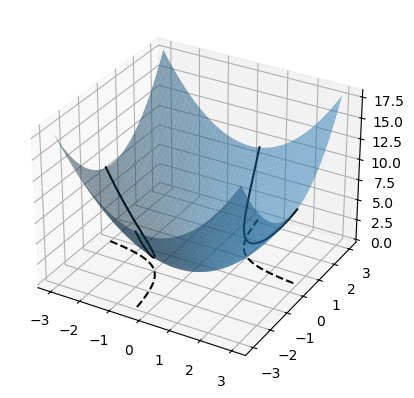

In [40]:
# 제약조건과 목적함수의 시각화
ax = plt.figure().add_subplot(projection='3d')
itvl = np.linspace(-3, 3)
X, Y = np.meshgrid(itvl, itvl)
h = lambda x, y: x**2 + y**2
ax.plot_surface(X, Y, h(X, Y), alpha=.5)

t = np.linspace(-1.1, 1.1)
x = lambda t: np.exp(t)
y = lambda t: np.exp(-t)
ax.plot(x(t), y(t), np.zeros(t.shape), 'k--')
ax.plot(x(t), y(t), h(x(t), y(t)), 'k')
ax.plot(-x(t), -y(t), np.zeros(t.shape), 'k--')
ax.plot(-x(t), -y(t), h(x(t), y(t)), 'k')


(np.float64(-2.0), np.float64(2.0), np.float64(-2.0), np.float64(2.0))

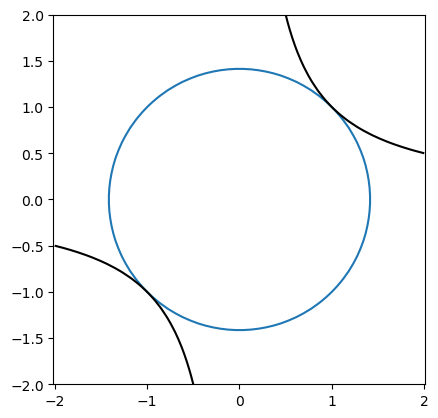

In [41]:
# 제약함수와 목적함수의 등위선의 시각화
itvl = np.linspace(-2, 2)
X, Y = np.meshgrid(itvl, itvl)
h = lambda x, y: x**2 + y**2
g = lambda x, y: x*y 
plt.figure(figsize=plt.figaspect(1))
plt.contour(X, Y, h(X, Y), levels=[2], colors='C0')
plt.contour(X, Y, g(X, Y), levels=[1], colors='k')
plt.axis('equal')

MovieWriter imagemagick unavailable; using Pillow instead.


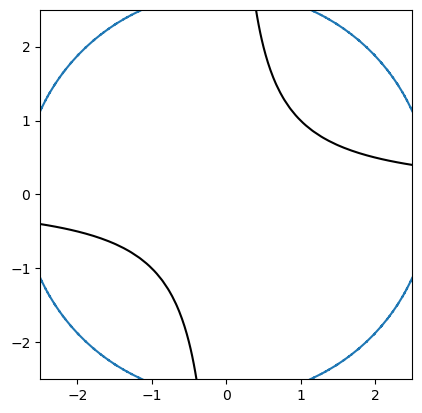

In [42]:
g = lambda x, y: x*y
h = lambda x, y: x**2 + y**2
itvl = np.linspace(-2.5, 2.5)
X, Y = np.meshgrid(itvl, itvl)
t = np.linspace(-1, 1)
x, y = np.exp(t), np.exp(-t)

fig, ax = plt.subplots(figsize=plt.figaspect(1))
ax.contour(X, Y, g(X,Y), levels=[1], colors='k')
xy_plot, = ax.plot([], [], 'ok')
xy_contour, = ax.plot([], [], color='C0')

def update(i):
    xy_plot.set_data([x[i]], [y[i]])
    c = contour(np.array([X, Y, h(X, Y)]), h(x[i], y[i]))
    xy_contour.set_data(c[:, 0], c[:, 1])
    return xy_plot, xy_contour,

a = ani.FuncAnimation(fig, update, frames=len(t), interval=len(t), blit=True) 
a.save('6-7.gif', writer='imagemagick')

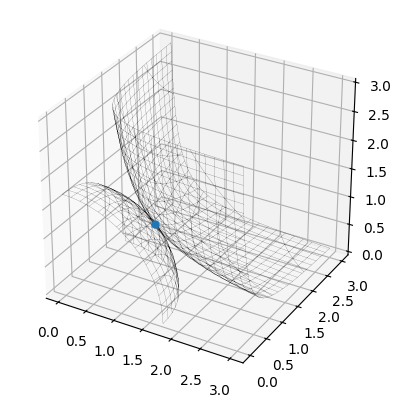

In [ ]:
# 삼변수함수의 라그랑주 승수법의 시각화
itvl = np.linspace(0, 3, 20)
X, Y, Z = np.meshgrid(itvl, itvl, itvl)
g = lambda x, y, z: x*y*z
h = lambda x, y, z: x**2 + y**2 + z**2

ax = plt.figure().add_subplot(projection='3d')
c = contour(np.array([X, Y, Z, g(X, Y, Z)]), 1.)
ax.plot(c[:, 0], c[:, 1], c[:, 2], 'k', lw=.1)
c = contour(np.array([X, Y, Z, h(X, Y, Z)]), 3.)
ax.plot(c[:, 0], c[:, 1], c[:, 2], 'k', lw=.1)
ax.plot(1,1,1, 'o', color='C0', markersize=5, zorder=5)
ax.set_aspect('equal')

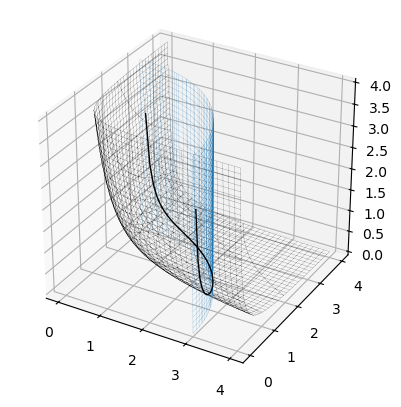

In [44]:
# 두 제약함수의 등위면의 시각화
ax = plt.figure().add_subplot(projection='3d')
itvl = np.linspace(-2, 2)
x = y = z = np.linspace(0, 4, 1<<4+1)
X, Y, Z = np.meshgrid(x, y, z)
g1 = lambda x, y, z: x*y*z
g2 = lambda x, y, z: x**2 + y**2
h = lambda x, y, z: x**2 + y**2 + z**2

c = contour(np.array([X, Y, Z, g1(X, Y, Z)]), 1)
ax.plot(c[:, 0], c[:, 1], c[:, 2], 'k', lw=.1)
c = contour(np.array([X, Y, Z, g2(X, Y, Z)]), 9)
ax.plot(c[:, 0], c[:, 1], c[:, 2], 'C0', lw=.1)
t = np.linspace(0.04, np.pi/2-.04)
ax.plot(3*np.cos(t), 3*np.sin(t), 1/(9*np.cos(t)*np.sin(t)), color='k', lw=1)
ax.set_aspect('equal')

## 6.3 경사 하강법 

(2.050, 2.146), left<49.464, 43.836right>
(1.555, 1.708), left<28.776, 25.496right>
(1.267, 1.453), left<16.741, 14.827right>
(1.100, 1.305), left<9.741, 8.622right>
(1.002, 1.219), left<5.669, 5.012right>
(0.946, 1.168), left<3.300, 2.913right>
(0.913, 1.139), left<1.922, 1.691right>
(0.894, 1.122), left<1.121, 0.981right>
(0.882, 1.113), left<0.654, 0.568right>
(0.876, 1.107), left<0.383, 0.328right>


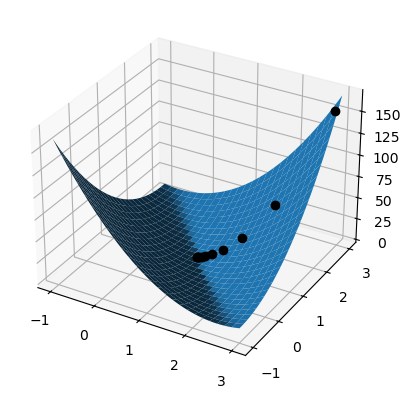

In [45]:
# 경사 하강법을 이용한 선형회귀법의 예
xy = np.array([
    [0.021, 0.186, 1.326, 1.101, 1.832, 1.383, 1.306, 1.233, 0.697, 0.592],
    [1.161, 1.273, 2.193, 2.111, 2.753, 2.293, 2.212, 2.103, 1.828, 1.453]])
x, y = xy[0], xy[1]
A, B, C, D, E = np.sum(y**2), np.sum(x*y), np.sum(y), np.sum(x), np.sum(x**2)
f = lambda c, d: A - 2*B*c - 2*C*d + 2*D*c*d + E*c**2 + xy.shape[1]*d**2
x = y = np.linspace(-1, 3, 51)
X, Y = np.meshgrid(x, y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, f(X, Y), zorder=3)
grd = lambda c, d: np.array([-2*B + 2*D*d + 2*E*c, 
                                  -2*C + 2*D*c + 2*xy.shape[1]*d])

h = 0.01
ps = np.array([[2.9, 2.9]])
for i in range(10):
    x, y = ps[-1,:] - h*grd(ps[-1,0], ps[-1, 1])
    print('(%.3f, %.3f), left<%.3f, %.3fright>' % (x, y, grd(x, y)[0], grd(x, y)[1]))
    ps = np.append(ps, [[x, y]], axis=0)
z = f(ps[:,0], ps[:,1])
ax.plot(ps[:,0], ps[:,1], z, 'ok', zorder=4)


In [3]:

!pip install tensorflow

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


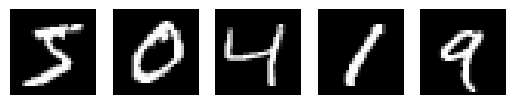

In [20]:
# 학습용 및 검증용 MNIST 데이터 불러오기
import tensorflow.keras.datasets.mnist as mnist

(img, label), (t_img, t_label) = mnist.load_data()
_, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(img[i], cmap='gray')
    ax[i].axis('off')

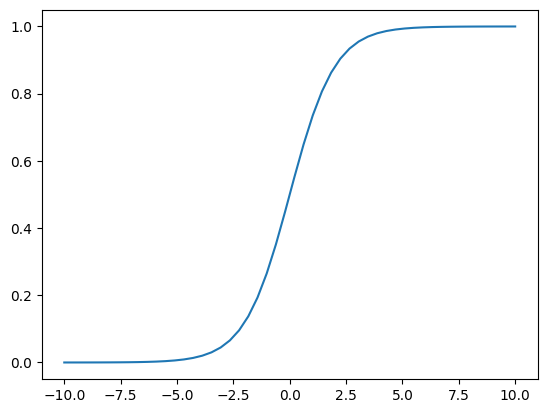

In [5]:
def sigmoid(y: float) -> float:
    return 1 / (1 + np.exp(-y))

y = np.linspace(-10, 10)
plt.plot(y, sigmoid(y))

In [12]:
def resize(img, h=10, w=10):
    shape = img.shape
    stride_h, stride_w = shape[0] / h, shape[1] / w
    resized = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            h0, h1 = int(i*stride_h), int((i+1)*stride_h)
            w0, w1 = int(j*stride_w), int((j+1)*stride_w)
            resized[i, j] = np.mean(img[h0:h1, w0:w1])
    return resized


(-0.5, 9.5, 9.5, -0.5)

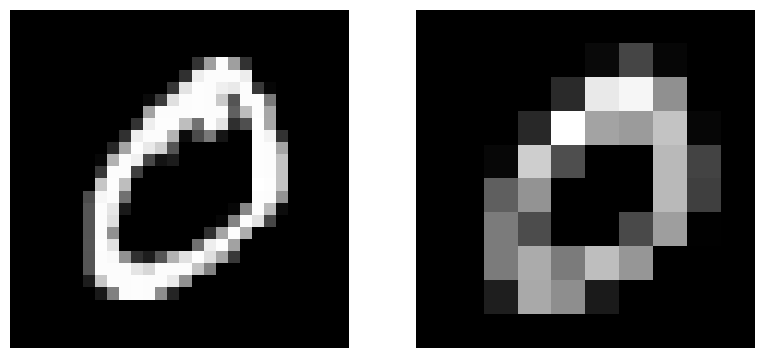

In [17]:
# 크기를 재조정한 이미지를 원본 이미지와 비교하여 출력
_, ax = plt.subplots(1, 2, figsize=plt.figaspect(.5))
ax[0].imshow(img[1], cmap='gray')
ax[0].axis('off')
ax[1].imshow(resize(img[1]), cmap='gray')
ax[1].axis('off')

In [21]:
# 0과 1 이미지만을 추출
train_img, train_label = [], []
for i in range(len(img)):
    l = label[i]
    if l == 0 or l == 1:
        train_img.append(resize(img[i]/255))
        train_label.append(label[i])
test_img, test_label = [], []
for i in range(len(t_img)):
    l = t_label[i]
    if l == 0 or l == 1:
        test_img.append(resize(t_img[i]/255))
        test_label.append(t_label[i])

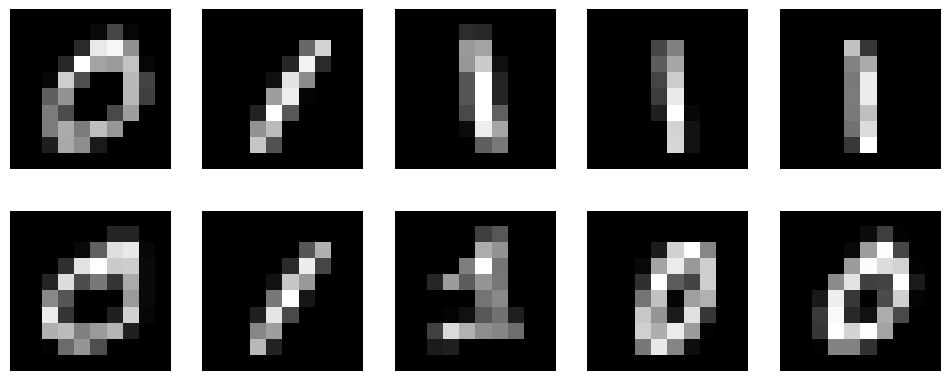

In [22]:
# 몇 개의 샘플 이미지 출력
_, ax = plt.subplots(2, 5, figsize=plt.figaspect(2/5))
ax = ax.flatten()
for i in range(10):
    ax[i].imshow(train_img[i], cmap='gray')
    ax[i].axis('off')

In [24]:
class nn():
    def __init__(self, size=10, rate=0.1):
        self.rate=rate
        self.weight = np.random.rand(size**2)
        self.bias = np.random.rand(1)

    def backward(self, x: np.array, y: float):
        z = self.forward(x)
        d_weight = 2*(z - y)*z*(1 - z)*x
        d_bias = 2*(z - y)*z*(1 - z)
        self.weight -= d_weight*self.rate
        self.bias -= d_bias*self.rate

    def forward(self, x: np.array) -> float:
        bar_y = np.dot(self.weight, x) + self.bias
        return sigmoid(bar_y)

In [26]:
# 훈련전 모델의 정확도 측정
model = nn()

sucess = 0
for i in range(len(test_img)):
    z = np.round(model.forward(test_img[i].flatten()))
    if z == test_label[i]:
        sucess += 1
print('success rate:', sucess/len(test_img))

# 훈련된 모델의 정확도 측정
for i in range(len(train_img)):
    model.backward(train_img[i].flatten(), train_label[i])

sucess = 0
for i in range(len(test_img)):
    z = np.round(model.forward(test_img[i].flatten()))
    if z == test_label[i]:
        sucess += 1
    else:
        print(i)
print('success rate:', sucess/len(test_img))

success rate: 0.5366430260047281
1388
2031
success rate: 0.9990543735224586


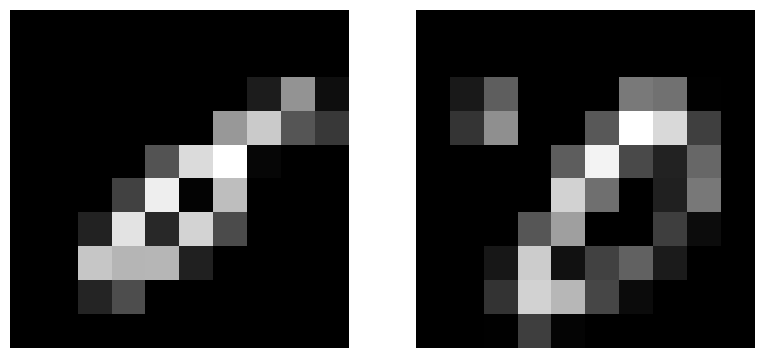

In [13]:
_, ax = plt.subplots(1, 2, figsize=plt.figaspect(.5))
ax = ax.flatten()
ax[0].imshow(test_img[1388], cmap='gray')
ax[0].axis('off')
ax[1].imshow(test_img[2031], cmap='gray')
ax[1].axis('off')
plt.savefig('img/ch-6/6-3-3-3.png', dpi=600, bbox_inches='tight')